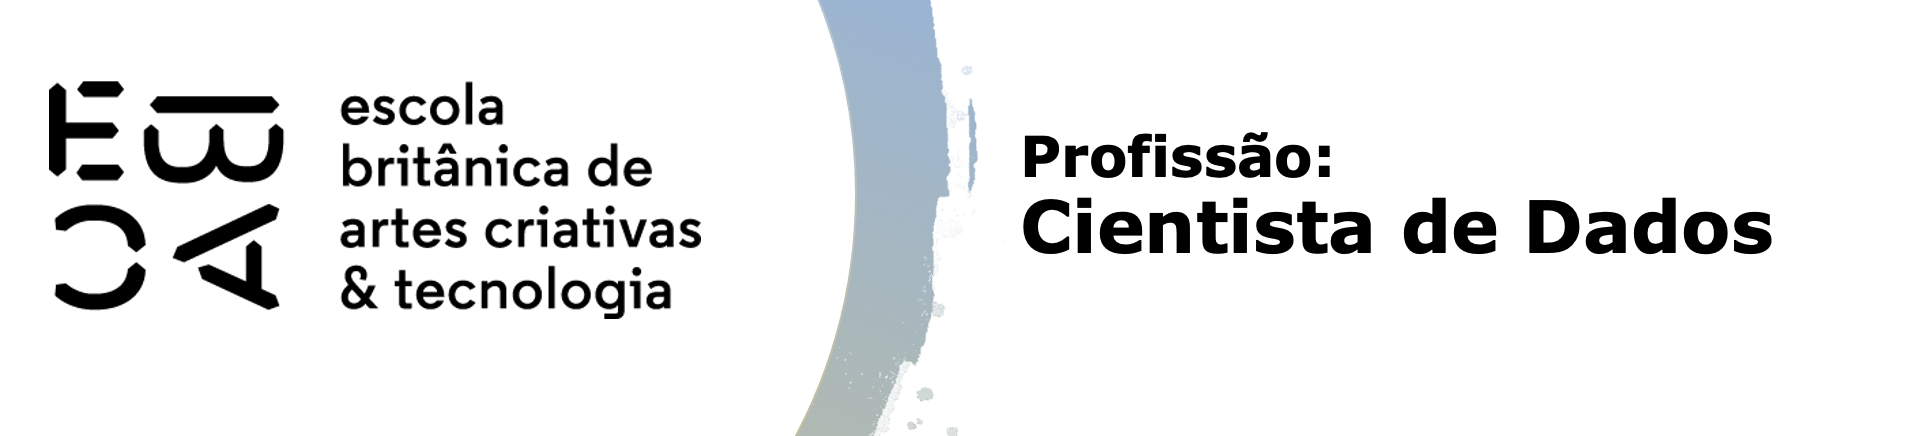

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [31]:
X_train = pd.read_csv('X_train.txt', sep=',')
X_test = pd.read_csv('X_test.txt',sep=',')
y_train = pd.read_csv('y_train.txt', header=None)
y_test = pd.read_csv('y_test.txt', header=None, delim_whitespace=True)

In [32]:
# X_test.rename(columns={'subject_test': 'subject'}, inplace=True)
# X_train.rename(columns={'subject_train': 'subject'}, inplace=True)

In [33]:
# coferindo o tamanho das bases
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7352, 563)
(2947, 563)
(7352, 1)
(2947, 1)


### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [34]:
%%time
clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=1729).fit(X_train, y_train)

importances = clf.feature_importances_

# nome das variáveis
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f'Feature {i}' for i in range(X_train.shape[1])]

# colocando em um df e ordenando
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# variável das top 3 selecionadas
top_3_features = importance_df.head(3)

print("As 3 variáveis mais importantes são:\n",top_3_features)

As 3 variáveis mais importantes são:
                              Feature  Importance
54               tGravityAcc-min()-X    0.256650
395  fBodyAccJerk-bandsEnergy()-1,24    0.215349
561             angle(Y,gravityMean)    0.145363
CPU times: total: 4.94 s
Wall time: 5.01 s


In [52]:
#lista das variáveis selecionadas acima
top_features = ['tGravityAcc-min()-X', 'fBodyAccJerk-bandsEnergy()-1,24', 'angle(Y,gravityMean)']
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

#ccp_alpha
clf = DecisionTreeClassifier(min_samples_leaf=20,random_state=2360873)
path = clf.cost_complexity_pruning_path(X_train_top, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [36]:
# ccp_alphas

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [ ]:
%%time
grid_parametros = {'ccp_alpha':ccp_alphas[::10]}
grid = GridSearchCV(estimator = clf, param_grid=grid_parametros,cv= 10, verbose=100)
grid.fit(X_train_top, y_train) 

In [45]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.032290,0.013643,0.004683,0.007153,0.0,{'ccp_alpha': 0.0},0.785326,0.717391,0.846259,0.682993,0.730612,0.767347,0.776871,0.797279,0.819048,0.755102,0.767823,0.046172,8
1,0.040099,0.015569,0.001556,0.004667,0.000012,{'ccp_alpha': 1.238729986009578e-05},0.785326,0.717391,0.846259,0.682993,0.730612,0.767347,0.776871,0.797279,0.819048,0.755102,0.767823,0.046172,8
2,0.031647,0.004089,0.001567,0.004700,0.000044,{'ccp_alpha': 4.373893191661916e-05},0.785326,0.717391,0.846259,0.682993,0.730612,0.767347,0.776871,0.797279,0.819048,0.755102,0.767823,0.046172,8
3,0.030433,0.004117,0.001566,0.004698,0.000093,{'ccp_alpha': 9.334706548123775e-05},0.785326,0.717391,0.846259,0.682993,0.730612,0.767347,0.776871,0.797279,0.819048,0.755102,0.767823,0.046172,8
4,0.031639,0.004084,0.001563,0.004688,0.00016,{'ccp_alpha': 0.00015957164468271418},0.789402,0.716033,0.843537,0.692517,0.731973,0.767347,0.790476,0.801361,0.828571,0.759184,0.772040,0.045894,7


In [46]:
grid.best_index_

11

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [54]:
melhor_ccp = resultados.iloc[grid.best_index_,4]

clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha = melhor_ccp).fit(X_train_top, y_train)

In [55]:
clf

DecisionTreeClassifier(ccp_alpha=0.005345729106908115, random_state=2360873)

In [56]:
clf.score(X_test_top, y_test)

0.7183576518493383

In [69]:
y_pred = clf.predict(X_test_top)
acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia na base de teste: {acuracia:.2f}")

Acurácia na base de teste: 0.72


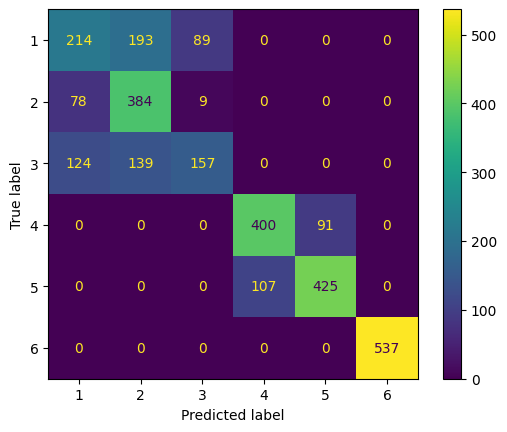

In [85]:
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred),
                       display_labels = clf.classes_).plot()

plt.show()

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Faça uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [81]:
y_train_binario = np.where(y_train == 1, 1, 0)
y_test_binario = np.where(y_test == 1, 1, 0)

In [ ]:
# y_test_binario

Acurácia da árvore binária para classe 1: 0.83


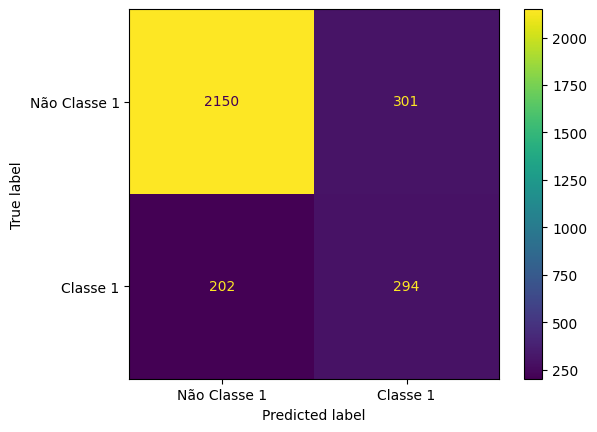

In [83]:
# Ainda utilizando as 3 variáveis mais importantes de X
# Classe com mais erro foi a 1

clf_binario = DecisionTreeClassifier(min_samples_leaf=20, max_depth=4, random_state=2360873).fit(X_train_top, y_train_binario)

y_pred_binario = clf_binario.predict(X_test_top)

acuracia_binario = accuracy_score(y_test_binario, y_pred_binario)
print(f"Acurácia da árvore binária para classe 1: {acuracia_binario:.2f}")

matriz_confusao_binario = confusion_matrix(y_test_binario, y_pred_binario)

ConfusionMatrixDisplay(confusion_matrix = matriz_confusao_binario,
                       display_labels=['Não Classe 1', 'Classe 1']).plot()

plt.show()